# Example 5.2 - Second-order differential equation

##### Initialisation

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#### The Sedond-order differential equation

Definition of the function that creates the differential equations.

In [2]:
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

Set the parameter values for the system: initial condition and numver of time samples.

In [3]:
z0 = [0,0]
n = 401

Define the Step-input signal. Note that the step is at sample number 51.

In [4]:
t = np.linspace(0,40,n)
u = np.zeros(n)
u[51:] = 2.0

Prepare for the solutions to be calculated

In [5]:
x = np.empty_like(t)
y = np.empty_like(t)
x[0] = z0[0]
y[0] = z0[1]

Solve the differential equation.

In [6]:
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

Plot the results of the calculation.

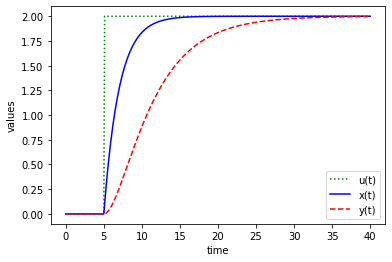

In [7]:
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

Note that the blue curve shows the first-order behaviour, and the red (dashed) curve the second-order behaviour.